まずインポート

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

import os

自分で作ったpyファイルをインストールしてもうまくいく  
データの処理はこっちでやる？

In [2]:
from load_data import load_train_data, load_test_data

# BASIC　EDA

trainデータを教師データと入力データに分けた

In [3]:
df_load_train = load_train_data()
x_train = df_load_train.drop('target', axis=1)
y_train = df_load_train['target']

In [4]:
x_train.head(10)

,id,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
0,1,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間
5,6,東京都荒川区南千住５丁目,常磐線快速\t南千住駅\t徒歩2分\t\t都電荒川線\t三ノ輪橋駅\t徒歩10分\t\t日比...,2LDK,7年6ヶ月,東,50.8m2,6階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐輪場\t空有\t駐車場\t近隣\t27,000円(税込)\t距離150m\tバイク置き場\t無",【スーパー】 251m\t【コンビニ】 376m,RC（鉄筋コンクリート）,2年間
6,7,東京都練馬区東大泉３丁目,西武池袋線\t大泉学園駅\t徒歩4分\t\t西武池袋線\t保谷駅\t徒歩25分\t\t東武東...,1K,10年5ヶ月,南,23.82m2,6階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐輪場\t空有\t駐車場\t近隣\t16,000円(税込)\t距離200m\tバイク置き場\t無",【スーパー】 812m\t【コンビニ】 149m\t【コンビニ】 942m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間
7,8,東京都目黒区鷹番１丁目,東急東横線\t学芸大学駅\t徒歩7分\t\t東急東横線\t都立大学駅\t徒歩16分\t\t東...,1K,14年4ヶ月,NaN,32.32m2,1階／6階建,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン,光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,NaN,【スーパー】 334m\t【スーパー】 562m\t【スーパー】 694m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
8,9,東京都文京区向丘１丁目,南北線\t東大前駅\t徒歩3分\t\t都営三田線\t白山(東京都)駅\t徒歩10分\t\t千...,2DK,44年8ヶ月,北西,65.59m2,4階／9階建,専用バス／\t専用トイレ／\tバス・トイレ別／\t追焚機能／\t洗面台独立,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯,NaN,エアコン付\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,SRC（鉄骨鉄筋コンクリート）,2年間
9,10,東京都板橋区板橋４丁目,埼京線\t板橋駅\t徒歩8分\t\t都営三田線\t新板橋駅\t徒歩4分\t\t東武東上線\t...,1DK,38年9ヶ月,南東,30.3m2,2階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,ガスコンロ／\tコンロ2口／\t給湯,光ファイバー／\tCATV,エアコン付\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,鉄骨造,2年間


In [7]:
y_train.describe()

count    3.147000e+04
mean     1.182903e+05
std      7.374880e+04
min      2.500000e+04
25%      7.600000e+04
50%      1.020000e+05
75%      1.360000e+05
max      2.500000e+06
Name: target, dtype: float64

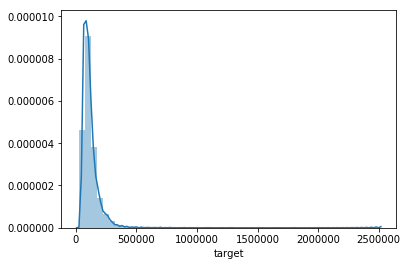

In [8]:
sns.distplot(y_train)

In [9]:
y_train.sort_values(ascending=False).head(10)

5093     2500000
20643    1800000
30539    1660000
1771     1450000
8706     1390000
9008     1300000
20989    1300000
15417    1300000
5775     1203500
1501     1200000
Name: target, dtype: int64

250万のデータを取ってきてます。  
x_trainのy_train==250万の行にアクセス

In [10]:
x_train[y_train==2500000]

,id,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
5093,5094,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,西,217.29m2,9階／9階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\tL...,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


最も多い住所を出力  
ユニークな要素の値　出現個数

In [11]:
x_train['Place'].value_counts().head(10)

東京都板橋区板橋３丁目1-8         54
東京都世田谷区太子堂２丁目          53
東京都足立区新田１丁目            47
東京都中野区白鷺２丁目1-21        45
東京都中央区日本橋馬喰町２丁目4-12    44
東京都豊島区池袋３丁目            43
東京都豊島区東池袋２丁目           40
東京都墨田区緑４丁目             39
東京都中央区日本橋馬喰町２丁目        38
東京都中野区江古田３丁目14-3       38
Name: Place, dtype: int64

In [12]:
x_train['Place'].value_counts().tail(10)

東京都江戸川区南葛西４丁目5-12    1
東京都江東区佐賀１丁目          1
東京都豊島区北大塚３丁目５‐１４     1
東京都葛飾区金町４丁目23-14     1
東京都葛飾区青戸４丁目25-14     1
東京都北区赤羽西１丁目15-16     1
東京都文京区小石川３丁目1-5      1
東京都世田谷区赤堤３丁目21-18    1
東京都足立区足立３丁目１９－１５     1
東京都目黒区中町１丁目２５-３６     1
Name: Place, dtype: int64

In [13]:
df_load_test = load_test_data()

In [14]:
df_load_test['Place'].value_counts().head(10)

東京都世田谷区太子堂２丁目       53
東京都板橋区板橋３丁目1-8      48
東京都中野区白鷺２丁目1-21     47
東京都豊島区南長崎５丁目        47
東京都中央区勝どき６丁目        42
東京都中央区日本橋馬喰町２丁目     41
東京都板橋区高島平１丁目        40
東京都江戸川区鹿骨５丁目        40
東京都江東区海辺            39
東京都中野区江古田３丁目14-3    37
Name: Place, dtype: int64

In [15]:
x_train['Access'].value_counts().head(10)

都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t西武新宿線\t沼袋駅\t徒歩15分           65
総武本線\t馬喰町駅\t徒歩4分\t\t都営浅草線\t浅草橋駅\t徒歩4分                                     61
都営三田線\t板橋区役所前駅\t徒歩5分\t\t東武東上線\t下板橋駅\t徒歩7分\t\t都営三田線\t新板橋駅\t徒歩8分            49
東西線\t木場(東京都)駅\t徒歩5分\t\t都営大江戸線\t門前仲町駅\t徒歩15分\t\t京葉線(東京－蘇我)\t越中島駅\t徒歩17分    48
西武新宿線\t鷺ノ宮駅\t徒歩8分\t\t西武新宿線\t都立家政駅\t徒歩14分\t\t西武新宿線\t下井草駅\t徒歩20分            45
総武本線\t馬喰町駅\t徒歩4分\t\t総武線・中央線（各停）\t浅草橋駅\t徒歩4分\t\t都営新宿線\t馬喰横山駅\t徒歩8分         44
都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩14分\t\t日比谷線\t築地駅\t徒歩21分                36
有楽町線\t新富町(東京都)駅\t徒歩3分\t\t日比谷線\t八丁堀(東京都)駅\t徒歩4分\t\t日比谷線\t築地駅\t徒歩5分         30
都営新宿線\t住吉(東京都)駅\t徒歩7分\t\t都営新宿線\t西大島駅\t徒歩19分\t\t都営新宿線\t菊川(東京都)駅\t徒歩20分     29
ゆりかもめ\t芝浦ふ頭駅\t徒歩2分\t\t山手線\t田町(東京都)駅\t徒歩15分\t\t都営三田線\t三田(東京都)駅\t徒歩19分      29
Name: Access, dtype: int64

In [16]:
x_train['Access'].value_counts().tail(10)

東武スカイツリーライン\t竹ノ塚駅\t徒歩17分\t\t日暮里・舎人ライナー\t舎人駅\t徒歩24分\t\t東武スカイツリーライン\t西新井駅\t徒歩45分    1
東急目黒線\t大岡山駅\t徒歩11分\t\t東急大井町線\t緑が丘(東京都)駅\t徒歩10分\t\t東急池上線\t石川台駅\t徒歩10分              1
有楽町線\t地下鉄赤塚駅\t徒歩9分\t\t有楽町線\t平和台(東京都)駅\t徒歩14分\t\t東武東上線\t下赤塚駅\t徒歩11分                1
西武新宿線\t上井草駅\t徒歩18分\t\t中央線（快速）\t西荻窪駅\t徒歩19分                                        1
都営浅草線\t馬込駅\t徒歩5分\t\t東急池上線\t長原(東京都)駅\t徒歩15分\t\t東急大井町線\t旗の台駅\t徒歩15分                 1
都営大江戸線\t新江古田駅\t徒歩2分\t\t西武池袋線\t江古田駅\t徒歩10分\t\t西武池袋線\t東長崎駅\t徒歩15分                   1
都営新宿線\t東大島駅\t徒歩12分\t\t都営新宿線\t大島(東京都)駅\t徒歩24分                                      1
東武東上線\t下板橋駅\t徒歩5分\t\t都営三田線\t新板橋駅\t徒歩5分\t\t埼京線\t板橋駅\t徒歩7分                          1
東西線\t九段下駅\t徒歩7分\t\t有楽町線\t市ケ谷駅\t徒歩7分\t\t半蔵門線\t半蔵門駅\t徒歩9分                           1
半蔵門線\t押上駅\t徒歩1分\t\t東武スカイツリーライン\tとうきょうスカイツリー駅\t徒歩7分\t\t総武線・中央線（各停）\t錦糸町駅\t徒歩17分    1
Name: Access, dtype: int64

In [17]:
df_load_test['Access'].value_counts().head(10)

都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t西武新宿線\t沼袋駅\t徒歩15分           66
西武新宿線\t鷺ノ宮駅\t徒歩8分\t\t西武新宿線\t都立家政駅\t徒歩14分\t\t西武新宿線\t下井草駅\t徒歩20分            47
総武本線\t馬喰町駅\t徒歩4分\t\t都営浅草線\t浅草橋駅\t徒歩4分                                     46
都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩14分\t\t日比谷線\t築地駅\t徒歩21分                46
都営三田線\t板橋区役所前駅\t徒歩5分\t\t東武東上線\t下板橋駅\t徒歩7分\t\t都営三田線\t新板橋駅\t徒歩8分            44
東西線\t木場(東京都)駅\t徒歩5分\t\t都営大江戸線\t門前仲町駅\t徒歩15分\t\t京葉線(東京－蘇我)\t越中島駅\t徒歩17分    39
総武本線\t馬喰町駅\t徒歩4分\t\t総武線・中央線（各停）\t浅草橋駅\t徒歩4分\t\t都営新宿線\t馬喰横山駅\t徒歩8分         37
ゆりかもめ\t芝浦ふ頭駅\t徒歩2分\t\t山手線\t田町(東京都)駅\t徒歩15分\t\t都営三田線\t三田(東京都)駅\t徒歩19分      29
都営大江戸線\t新御徒町駅\t徒歩7分\t\t銀座線\t稲荷町(東京都)駅\t徒歩7分\t\t銀座線\t田原町(東京都)駅\t徒歩8分       29
西武池袋線\t東長崎駅\t徒歩1分\t\t都営大江戸線\t落合南長崎駅\t徒歩9分                                 29
Name: Access, dtype: int64

In [18]:
x_train['Passed'].value_counts().head(10)

0年1ヶ月     983
新築        889
0年0ヶ月     704
0年2ヶ月     644
0年3ヶ月     508
0年5ヶ月     484
0年6ヶ月     378
0年4ヶ月     323
12年5ヶ月    262
11年5ヶ月    227
Name: Passed, dtype: int64

In [19]:
x_train['Passed'].value_counts().tail(10)

70年7ヶ月     1
61年9ヶ月     1
62年2ヶ月     1
64年7ヶ月     1
62年1ヶ月     1
61年1ヶ月     1
61年2ヶ月     1
60年9ヶ月     1
63年10ヶ月    1
57年5ヶ月     1
Name: Passed, dtype: int64

In [20]:
x_train['Angle'].value_counts()

南     8909
東     4995
西     4026
南東    3098
南西    3080
北     1966
北西    1326
北東    1321
Name: Angle, dtype: int64

In [21]:
df_load_train['Place'].head(10)

0          東京都北区滝野川３丁目
1          東京都中央区月島３丁目
2          東京都渋谷区笹塚２丁目
3    東京都杉並区高円寺南２丁目23-2
4       東京都葛飾区金町３丁目7-2
5         東京都荒川区南千住５丁目
6         東京都練馬区東大泉３丁目
7          東京都目黒区鷹番１丁目
8          東京都文京区向丘１丁目
9          東京都板橋区板橋４丁目
Name: Place, dtype: object

In [22]:
import requests
from bs4 import BeautifulSoup
import time
import tqdm


URL = 'http://www.geocoding.jp/api/'


def coordinate(address):
    """
    addressに住所を指定すると緯度経度を返す。

    >>> coordinate('東京都文京区本郷7-3-1')
    ['35.712056', '139.762775']
    """
    payload = {'q': address}
    html = requests.get(URL, params=payload)
    soup = BeautifulSoup(html.content, "html.parser")
    if soup.find('error'):
        raise ValueError(f"Invalid address submitted. {address}")
    latitude = soup.find('lat').string
    longitude = soup.find('lng').string
    return [latitude, longitude]


def coordinates(addresses, interval=10, progress=True):
    """
    addressesに住所リストを指定すると、緯度経度リストを返す。

    >>> coordinates(['東京都文京区本郷7-3-1', '東京都文京区湯島３丁目３０−１'], progress=False)
    [['35.712056', '139.762775'], ['35.707771', '139.768205']]
    """
    coordinates = []
    for address in progress and tqdm(addresses) or addresses:
        coordinates.append(coordinate(address))
        time.sleep(interval)
    return coordinates

In [23]:
coordinate(x_train['Place'][1])

['35.662885', '139.778627']

In [24]:
x_train['Place'].dtypes

dtype('O')

In [25]:
coordinate(x_train['Place'][1])

['35.662885', '139.778627']

In [36]:
gps = []
for id in range(2):
    gps.append(coordinate(x_train['Place'][id]))
    print(gps)

[['35.748456', '139.7288']]
[['35.748456', '139.7288'], ['35.662885', '139.778627']]


In [41]:
lat,lon = zip(*gps)
print(lat)
print(lon)

('35.748456', '35.662885')
('139.7288', '139.778627')


In [44]:
GPS = pd.Series(lat, lon)
print(GPS)

139.7288      35.748456
139.778627    35.662885
dtype: object


dtype('O')

In [64]:
x_train['Place'] = GPS[:][0]
x_train.head(10)

,id,Place,Access,Room,Passed,Angle,Area,Floor,Bath,Kitchen,Internet,Facility,Parking,Building,Material,Contract
31460,31461,35.748456,りんかい線\t品川シーサイド駅\t徒歩1分\t\t京急本線\t青物横丁駅\t徒歩10分\t\...,1K,16年1ヶ月,西,63.27m2,29階／30階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\t独立キッチン,インターネット対応／\t光ファイバー／\tCATV,エアコン付／\t床暖房\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換...,駐輪場\t空有\tバイク置き場\t空有\t駐車場\t無,【スーパー】 512m\t【スーパー】 1331m\t【スーパー】 1403m\t【スーパー...,RC（鉄筋コンクリート）,2年間
31461,31462,35.748456,銀座線\t銀座駅\t徒歩8分\t\t都営浅草線\t東銀座駅\t徒歩7分\t\t有楽町線\t新...,1K,12年0ヶ月,北西,24.16m2,14階／14階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t独立キッチン,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気...,駐輪場\t空有,NaN,RC（鉄筋コンクリート）,NaN
31462,31463,35.748456,都営大江戸線\t新江古田駅\t徒歩10分\t\t西武池袋線\t江古田駅\t徒歩20分\t\t...,2LDK+S(納戸),1年0ヶ月,東,69.54m2,1階／14階建,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座,ガスコンロ／\tコンロ3口／\t給湯,インターネット対応／\tCATV／\tインターネット使用料無料,エアコン付／\t床暖房\tフローリング／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエ...,"駐車場\t空有\t32,400円(税込)\t駐輪場\t空有\tバイク置き場\t無",NaN,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
31463,31464,35.748456,有楽町線\t豊洲駅\t徒歩9分\t\tゆりかもめ\t新豊洲駅\t徒歩5分\t\tゆりかもめ\...,2LDK,3年9ヶ月,南東,55.98m2,18階／19階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tIHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン,インターネット対応／\t高速インターネット／\t光ファイバー／\tCATV／\tCSアンテナ...,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気...,"駐車場\t空有\t27,000円\t駐輪場\t空有\tバイク置き場\t空有",NaN,RC（鉄筋コンクリート）,NaN
31464,31465,35.748456,都営浅草線\t戸越駅\t徒歩5分\t\t東急池上線\t戸越銀座駅\t徒歩7分\t\t東急大井...,1K,新築,西,27.96m2,3階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCSアンテナ／\tBSアンテナ／\tインターネット使用料無料,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\...,"駐車場\t空有\t25,920円(税込)\t駐輪場\t空有\tバイク置き場\t無",【スーパー】 239m\t【スーパー】 298m\t【コンビニ】 408m,木造,2年間
31465,31466,35.748456,都営三田線\t蓮根駅\t徒歩7分\t\t都営三田線\t西台駅\t徒歩10分\t\t都営三田線...,2DK,30年0ヶ月,南,37.9m2,1階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t洗面台独立,ガスコンロ／\tコンロ2口／\t給湯,インターネット対応,エアコン付\tバルコニー／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,鉄骨造,2年間
31466,31467,35.748456,東急田園都市線\t三軒茶屋駅\t徒歩6分\t\t東急世田谷線\t西太子堂駅\t徒歩4分\t\...,1R,39年7ヶ月,西,12.04m2,4階／4階建,専用バス／\t専用トイレ／\tシャワー,ガスコンロ／\tコンロ1口／\t給湯,NaN,エアコン付\tバルコニー／\tフローリング／\t室外洗濯機置場／\tタイル張り\t公営水道／...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 458m\t【スーパー】 540m\t【コンビニ】 131m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
31467,31468,35.748456,東西線\t南砂町駅\t徒歩5分\t\t都営新宿線\t大島(東京都)駅\t徒歩26分\t\t東...,3DK,45年10ヶ月,南,60m2,3階／5階建,バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座,ガスコンロ／\tコンロ2口,光ファイバー,シューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場\t都市ガス,駐輪場\t空有\tバイク置き場\t無,【コンビニ】 302m\t【コンビニ】 394m\t【コンビニ】 452m\t【コンビニ】 ...,鉄骨造,2年間
31468,31469,35.748456,中央線（快速）\t中野(東京都)駅\t徒歩4分\t\t丸ノ内線(池袋－荻窪)\t新中野駅\t...,1DK,11年0ヶ月,南,29.59m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t3面採光／\t室内洗濯...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 485m\t【スーパー】 1051m\t【コンビニ】 476m\t【コンビニ】...,木造,2年間
31469,31470,35.748456,有楽町線\t千川駅\t徒歩5分\t\t有楽町線\t要町駅\t徒歩13分\t\t西武池袋線\t...,1K,60年2ヶ月,南東,25m2,2階／3階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー,ガスコンロ／\t給湯,高速インターネット,エアコン付\tフローリング／\t室内洗濯機置場\t公営水道／\t都市ガス,駐車場\t無,NaN,鉄骨造,2年間
